<a href="https://colab.research.google.com/github/SushilKokare/University_Project/blob/Keras_Applications/34_ConvNeXtTiny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras import backend as k
from keras.applications import ConvNeXtTiny
from matplotlib import pyplot as plt

In [7]:

def show_result(history):
  plt.figure(figsize=(5,3))
  plt.title("Loss Training Vs Validation")
  plt.plot(history.history['loss'],color='blue',label='Train Loss')
  plt.plot(history.history['val_loss'],color='orange',label='Val Loss')
  plt.legend()
  plt.show()

  plt.figure(figsize=(5,3))
  plt.title("Accuracy Training Vs Validation")
  plt.plot(history.history['accuracy'],color='blue',label='Train Acc')
  plt.plot(history.history['val_accuracy'],color='orange',label='Val Acc')
  plt.legend()
  plt.show()
     

In [4]:
def prepro_data(pathTrain,pathTest,img_size,batch_size):
  
  if k.image_data_format() == 'channels_first':
    input_shape = (3,img_size[0],img_size[1])
  else:
    input_shape = (img_size[0],img_size[1],3)

  train_gen = ImageDataGenerator(rescale = 1./255)
  test_gen = ImageDataGenerator(rescale = 1./255)

  train_data = train_gen.flow_from_directory(
      pathTrain,
      target_size = img_size,
      # batch_size = batch_size,
      class_mode = 'binary'
  ) 

  test_data = test_gen.flow_from_directory(
      pathTest,
      target_size = img_size,
      # batch_size = batch_size,
      class_mode = 'binary'
  )

  print(" Train Data Image Shape = {}".format(train_data.image_shape))
  print(" Test Data Image Shape = {}".format(test_data.image_shape))
  print("Input Shape = {} ".format(input_shape))

  return train_data , test_data , input_shape

In [5]:
pathTrain = '/content/drive/MyDrive/AtiNeu Project/Data/MRI/Brain_Data_Organised/Train'
pathTest = '/content/drive/MyDrive/AtiNeu Project/Data/MRI/Brain_Data_Organised/Test'
     

In [6]:
train_data , test_data, input_shape = prepro_data(pathTrain,pathTest,(225,225),32)


Found 2251 images belonging to 2 classes.
Found 250 images belonging to 2 classes.
 Train Data Image Shape = (225, 225, 3)
 Test Data Image Shape = (225, 225, 3)
Input Shape = (225, 225, 3) 


In [8]:
base_model = ConvNeXtTiny(weights = 'imagenet',include_top = False,
                      input_shape = input_shape)

111650432/111650432 [==============================] - 2s 0us/step


In [9]:
for layer in base_model.layers:
  layer.trainable = False


model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])

Epoch 1/10
71/71 [==============================] - 411s 6s/step - loss: 1.6553 - accuracy: 0.6251 - val_loss: 0.8905 - val_accuracy: 0.6080
Epoch 2/10
71/71 [==============================] - 20s 281ms/step - loss: 0.4372 - accuracy: 0.8010 - val_loss: 0.5489 - val_accuracy: 0.6960
Epoch 3/10
71/71 [==============================] - 20s 278ms/step - loss: 0.2293 - accuracy: 0.9196 - val_loss: 0.5952 - val_accuracy: 0.7400
Epoch 4/10
71/71 [==============================] - 20s 275ms/step - loss: 0.2137 - accuracy: 0.9156 - val_loss: 0.5274 - val_accuracy: 0.7400
Epoch 5/10
71/71 [==============================] - 19s 272ms/step - loss: 0.1495 - accuracy: 0.9516 - val_loss: 0.5384 - val_accuracy: 0.7400
Epoch 6/10
71/71 [==============================] - 20s 282ms/step - loss: 0.1113 - accuracy: 0.9685 - val_loss: 0.6277 - val_accuracy: 0.7400
Epoch 7/10
71/71 [==============================] - 20s 274ms/step - loss: 0.0746 - accuracy: 0.9809 - val_loss: 0.5035 - val_accuracy: 0.7680
E

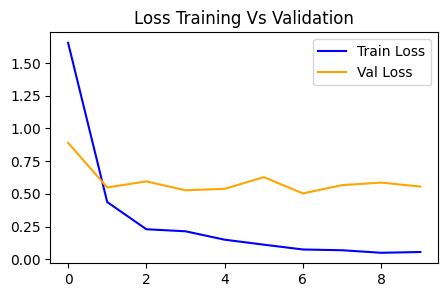

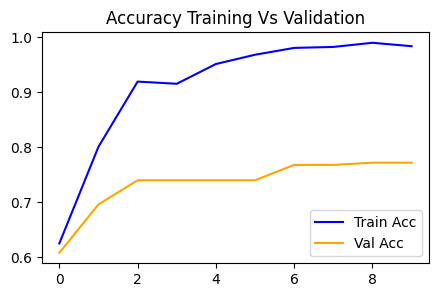

In [10]:
history = model.fit(train_data,epochs=10,validation_data=test_data)

show_result(history)

In [12]:
import pandas as pd

pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.655286,0.625056,0.890451,0.608
1,0.437214,0.800977,0.548910,0.696
2,0.229305,0.919591,0.595233,0.740
3,0.213698,0.915593,0.527371,0.740
4,0.149450,0.951577,0.538369,0.740
5,0.111331,0.968458,0.627750,0.740
6,0.074562,0.980897,0.503481,0.768
7,0.068724,0.982674,0.566629,0.768
8,0.049394,0.990227,0.586112,0.772
9,0.055372,0.984007,0.555896,0.772
